# Import spatial data of Toronto neighborhood

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [3]:
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":906439794,"wgRevisionId":906439794,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",

In [4]:
My_table = soup.find('table',class_='wikitable sortable')
My_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>
<tr>
<td>M6A</td>

In [5]:
import numpy as np
Info=[]
tbody = My_table.find('tbody')
trs = tbody.find_all('tr')
for tr in trs:
    tds = tr.find_all('td')
    for td in tds:
        Info.append(td.text)
cols=3
rows=int(len(Info)/cols)
print(rows)
data=np.reshape(Info,(rows,cols))
PostalCode=[]
Borough=[]
Neighbor=[]
Neighborhood=[]
i=1
for a in range(rows):
    for b in range(cols):
        if b==0:
            PostalCode.append(data[a][b])
        elif b==1:
            Borough.append(data[a][b])
        elif b==2: 
            Neighbor.append(data[a][b])
for a in Neighbor:
    Neighborhood.append(a[:-1])


288


In [6]:
df=list(zip(PostalCode,Borough,Neighborhood))

In [7]:
df=pd.DataFrame(df)
df.head()

,0,1,2
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [8]:
df.columns=['PostalCode','Borough','Neighborhood']

In [9]:
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [10]:
df=df[~df['Borough'].isin(['Not assigned'])]
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [11]:
for i in range(df.shape[0]):
    if df.iloc[i,2]=='Not assigned':
        df.iloc[i,2]=df.iloc[i,1]
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [12]:
result = df.groupby(['PostalCode','Borough']).agg(', '.join).reset_index()

In [13]:
result.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [14]:
result.shape

(103, 3)

In [15]:
df1=pd.read_csv('http://cocl.us/Geospatial_data')

In [16]:
df1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
df1=pd.DataFrame(df1)

In [18]:
result['Latitude']=df1['Latitude']
result['Longitude']=df1['Longitude']

In [19]:
result.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Visualize spatial data of Toronto neighborhood

Get latitude and longgitube of Toronto

In [20]:
from geopy.geocoders import Nominatim
address = 'Toronto'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 43.653963, -79.387207.


Create a map of Toronto

In [21]:
import folium
Map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Toronto)  

Map_Toronto

Define Foursquare credentials and version

In [22]:
CLIENT_ID = 'Z2LBULTEWZZDAIVJOYW5ZNTHC4PSLABFBL22NE4MATP0ZXHJ' # your Foursquare ID
CLIENT_SECRET = '0FFAO34M202IKFM0YVKA3X5T1XB2FVPDW3T0BAQJECPBCUXP' # your Foursquare Secret
VERSION = '20190722' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z2LBULTEWZZDAIVJOYW5ZNTHC4PSLABFBL22NE4MATP0ZXHJ
CLIENT_SECRET:0FFAO34M202IKFM0YVKA3X5T1XB2FVPDW3T0BAQJECPBCUXP


Create a function for cleansing data acquired from Foursquare

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=1000
    search_query='Coffee'
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,  
            lat, 
            lng, 
            VERSION,
            search_query,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        for v in results:
            if len(v['categories']) !=0:
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    v['categories'][0]['name'],
                    v['id']) ])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'ID']
    
    return(nearby_venues)

Get a quick look of the coffee shop in the neighborhood

In [24]:
Toronto_venues = getNearbyVenues(names=result['Neighborhood'],
                                   latitudes=result['Latitude'],
                                   longitudes=result['Longitude'], 
                                  )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

Take a look at the coffee shop in the neighborhood

In [39]:
print(Toronto_venues.shape)
Toronto_venues.rename(columns={"Venue Latitude": "Latitude", "VenueLongitude": "Longitude","Venue Category": "Category"})
Toronto_venues.head()

(413, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,ID
0,Cedarbrae,43.773136,-79.239476,Coffee Culture,43.776278,-79.234026,Coffee Shop,4b8bf7fbf964a5206eb532e3
1,"Maryvale, Wexford",43.750072,-79.295849,Sam's Coffee Truck,43.749280,-79.289110,Food Truck,53eb9c59498ed0f6cc2f1bcc
2,L'Amoreaux West,43.799525,-79.318389,Coffee Time,43.797952,-79.318678,Coffee Shop,4e4bcc4162e1ce23e579d8dc
3,L'Amoreaux West,43.799525,-79.318389,Coffee Here,43.796399,-79.316031,Coffee Shop,5314afbf498ee2179f771115
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tarts Treats & Coffee,43.775790,-79.346340,Coffee Shop,59fe129cf4b52520eb2865c7


Visualize the coffee shops

In [27]:
Map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add a red circle marker to represent every neighborhood
for lat, lng, borough, neighborhood in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Toronto)  
# add the cafe as blue circle markers
for lat, lng, label in zip(Toronto_venues.Venue_Latitude, Toronto_venues.Venue_Longitude, Toronto_venues.Venue_Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Map_Toronto)

# display map
Map_Toronto

In [28]:
Cafe_per_Neigh=Toronto_venues.groupby('Neighborhood').count()
Cafe_per_Neigh.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,ID
Neighborhood,,,,,,,
"Adelaide, King, Richmond",40,40,40,40,40,40,40
"Alderwood, Long Branch",2,2,2,2,2,2,2
Berczy Park,14,14,14,14,14,14,14
"Brockton, Exhibition Place, Parkdale Village",5,5,5,5,5,5,5
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",1,1,1,1,1,1,1


In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plt.bar(Cafe_per_Neigh.index,Cafe_per_Neigh['Venue_Category'], width=0.8, bottom=None, align='center') 
plt.ylabel('No.of Cafe', fontsize=30)
plt.title('No.of Cafe in every neighborhood',fontsize=40)
plt.rc('axes', titlesize=28)     # fontsize of the axes title
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=28)    
plt.xticks(rotation='vertical')
plt.show()

<Figure size 4000x2000 with 1 Axes>

In [30]:
Cafe_per_Neigh.sort_values('Venue_Category', ascending = False, inplace=True)
Cafe_per_Neigh.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,ID
Neighborhood,,,,,,,
"Adelaide, King, Richmond",40,40,40,40,40,40,40
"First Canadian Place, Underground city",39,39,39,39,39,39,39
"Commerce Court, Victoria Hotel",37,37,37,37,37,37,37
"Design Exchange, Toronto Dominion Centre",33,33,33,33,33,33,33
Central Bay Street,30,30,30,30,30,30,30


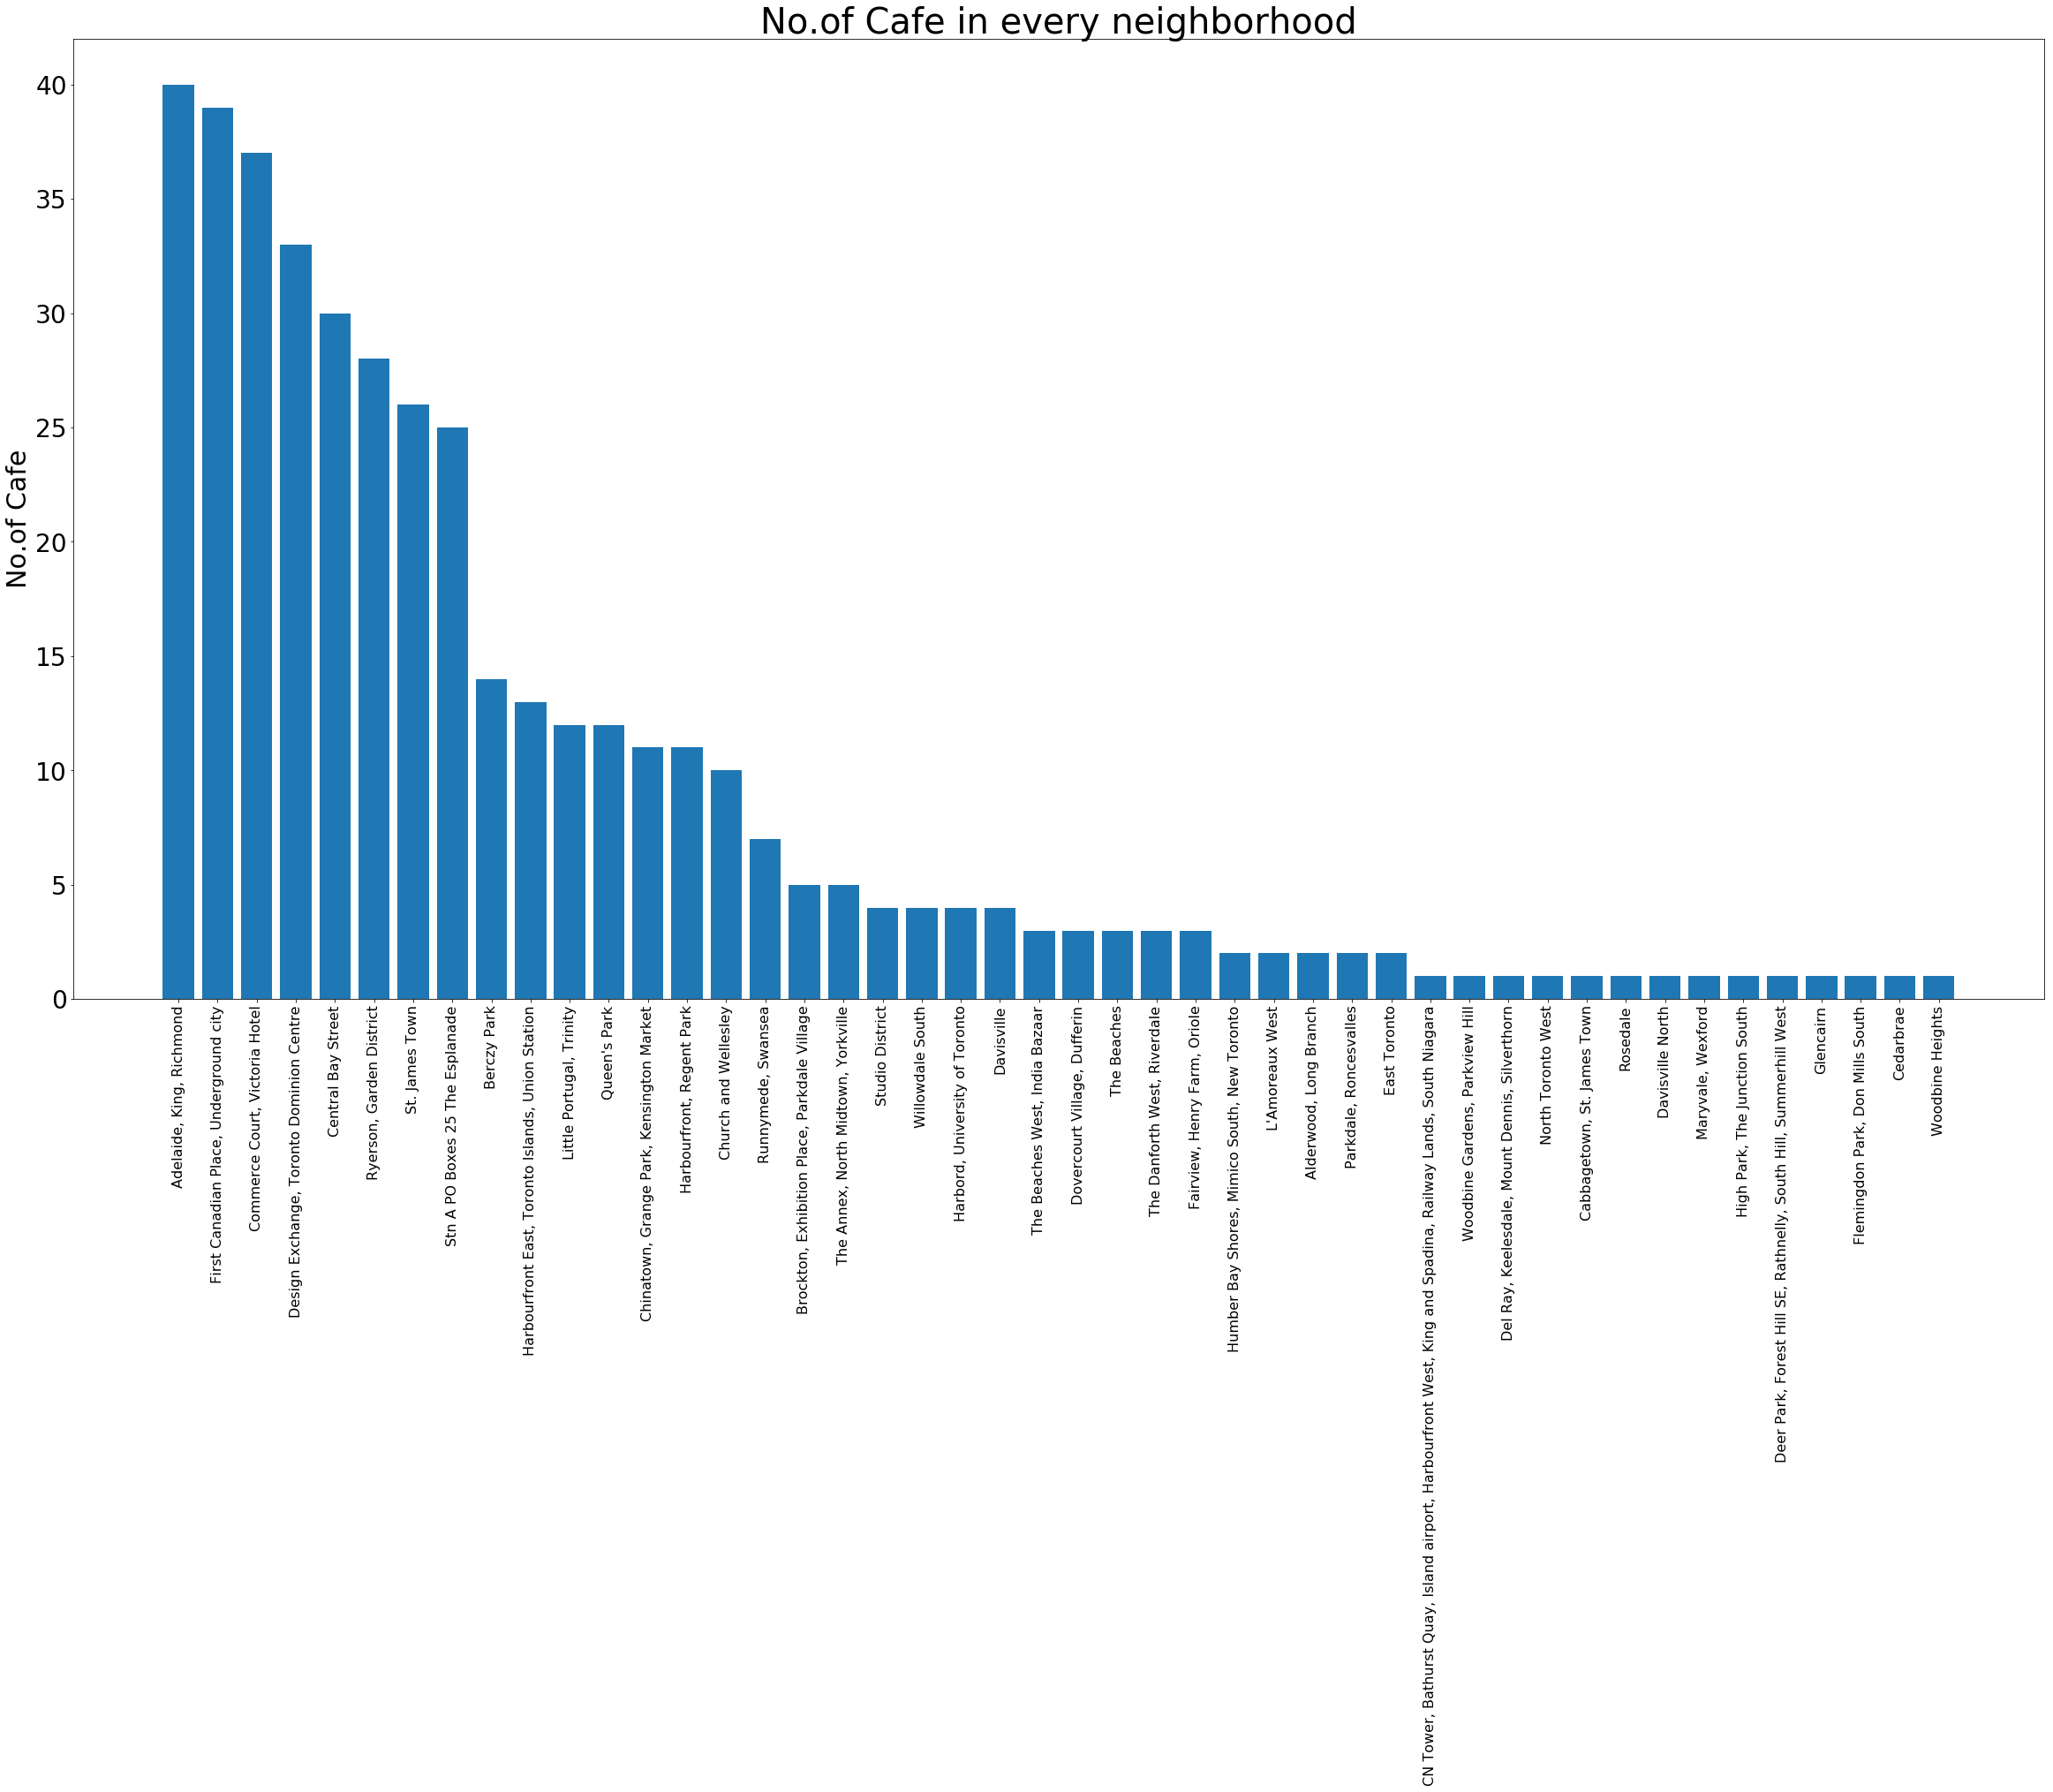

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plt.bar(Cafe_per_Neigh.index,Cafe_per_Neigh['Venue_Category'], width=0.8, bottom=None, align='center') 
plt.ylabel('No.of Cafe', fontsize=30)
plt.title('No.of Cafe in every neighborhood',fontsize=40)
plt.rc('axes', titlesize=28)     # fontsize of the axes title
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=28)    
plt.xticks(rotation='vertical')
plt.show()

In [32]:
rank=[]
for id in Toronto_venues['ID']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id, CLIENT_ID, CLIENT_SECRET, VERSION)
    info = requests.get(url).json()
    print(info)
    try:
        rank.append(info['response']['venue']['rating'])
    except:
        rank.append(i)

    


{'meta': {'code': 200, 'requestId': '5d3ae3834651320025b44d5d'}, 'response': {'venue': {'id': '4b8bf7fbf964a5206eb532e3', 'name': 'Coffee Culture', 'contact': {'phone': '4164392233', 'formattedPhone': '(416) 439-2233', 'twitter': 'coffeecultureca', 'facebook': '211143895639474', 'facebookUsername': 'CoffeeCultureCafe', 'facebookName': 'Coffee Culture Café & Eatery'}, 'location': {'address': '2060 Ellesmere Rd', 'crossStreet': 'at Markham Rd', 'lat': 43.77627788363806, 'lng': -79.23402640869378, 'labeledLatLngs': [{'label': 'display', 'lat': 43.77627788363806, 'lng': -79.23402640869378}], 'postalCode': 'M1H 2V6', 'cc': 'CA', 'city': 'Scarborough', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2060 Ellesmere Rd (at Markham Rd)', 'Scarborough ON M1H 2V6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-culture/4b8bf7fbf964a5206eb532e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop'

{'meta': {'code': 200, 'requestId': '5d3ae383ceb2ea0025d85703'}, 'response': {'venue': {'id': '53eb9c59498ed0f6cc2f1bcc', 'name': "Sam's Coffee Truck", 'contact': {}, 'location': {'lat': 43.74928003852302, 'lng': -79.28910977830938, 'labeledLatLngs': [{'label': 'display', 'lat': 43.74928003852302, 'lng': -79.28910977830938}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sams-coffee-truck/53eb9c59498ed0f6cc2f1bcc', 'categories': [{'id': '4bf58dd8d48988d1cb941735', 'name': 'Food Truck', 'pluralName': 'Food Trucks', 'shortName': 'Food Truck', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '37093750', 'firstName': 'Kevin', 'lastName': 'Proulx', 'gender': 'male', 'photo': {'prefi

{'meta': {'code': 200, 'requestId': '5d3ae384ad1789002cac782b'}, 'response': {'venue': {'id': '59fe129cf4b52520eb2865c7', 'name': 'Tarts Treats & Coffee', 'contact': {}, 'location': {'lat': 43.77579, 'lng': -79.34634, 'labeledLatLngs': [{'label': 'display', 'lat': 43.77579, 'lng': -79.34634}], 'postalCode': 'M2J', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON M2J', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/tarts-treats--coffee/59fe129cf4b52520eb2865c7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'uncon

{'meta': {'code': 200, 'requestId': '5d3ae3865d891b002c5d1bca'}, 'response': {'venue': {'id': '50b6489be4b0bcc63e8fff31', 'name': 'Little Italy Coffee Shop', 'contact': {}, 'location': {'lat': 43.767727735373285, 'lng': -79.41273906234696, 'labeledLatLngs': [{'label': 'display', 'lat': 43.767727735373285, 'lng': -79.41273906234696}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/little-italy-coffee-shop/50b6489be4b0bcc63e8fff31', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': F

{'meta': {'code': 200, 'requestId': '5d3ae3875315930039cd762c'}, 'response': {'venue': {'id': '50b137d1e4b03c6b1e792132', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '180 Queen Street West', 'crossStreet': 'University Ave.', 'lat': 43.766993786734005, 'lng': -79.41078775205344, 'labeledLatLngs': [{'label': 'display', 'lat': 43.766993786734005, 'lng': -79.41078775205344}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['180 Queen Street West (University Ave.)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/50b137d1e4b03c6b1e792132', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'url': 'http://www.starbucks.com', 'price': {'tier': 1, 'message': 'Cheap', 'curr

{'meta': {'code': 200, 'requestId': '5d3ae389e97dfb002c809c4c'}, 'response': {'venue': {'id': '4b8ef520f964a5201d4133e3', 'name': 'Best Coffee House', 'contact': {}, 'location': {'address': '2273 Queen St E', 'crossStreet': 'Beech', 'lat': 43.672494, 'lng': -79.28769, 'labeledLatLngs': [{'label': 'display', 'lat': 43.672494, 'lng': -79.28769}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2273 Queen St E (Beech)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/best-coffee-house/4b8ef520f964a5201d4133e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [

{'meta': {'code': 200, 'requestId': '5d3ae38be97dfb002c80a743'}, 'response': {'venue': {'id': '53b559db498e9ba407d56c4d', 'name': 'Marvel Coffee Company', 'contact': {}, 'location': {'address': '990 Danforth Ave', 'crossStreet': 'Donlands & Danforth', 'lat': 43.68071553476836, 'lng': -79.33752594265454, 'labeledLatLngs': [{'label': 'display', 'lat': 43.68071553476836, 'lng': -79.33752594265454}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['990 Danforth Ave (Donlands & Danforth)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/marvel-coffee-company/53b559db498e9ba407d56c4d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'l

{'meta': {'code': 200, 'requestId': '5d3ae38bceb2ea0025d88e0b'}, 'response': {'venue': {'id': '4eef7149e300215595bfbbfc', 'name': "Mom's Gourmet Coffee N' Things", 'contact': {}, 'location': {'address': '1096 Danforth Ave', 'crossStreet': 'Cathiness Ave', 'lat': 43.681025, 'lng': -79.334974, 'labeledLatLngs': [{'label': 'display', 'lat': 43.681025, 'lng': -79.334974}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1096 Danforth Ave (Cathiness Ave)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/moms-gourmet-coffee-n-things/4eef7149e300215595bfbbfc', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 

{'meta': {'code': 200, 'requestId': '5d3ae38d5315930039cd9919'}, 'response': {'venue': {'id': '55fc0110498ecbc14aa76933', 'name': 'Marvel Coffee Co.', 'contact': {'twitter': 'marvelcoffeeco'}, 'location': {'address': '792 Carlaw Ave.', 'crossStreet': 'Danforth', 'lat': 43.678629530863844, 'lng': -79.34746013725268, 'labeledLatLngs': [{'label': 'display', 'lat': 43.678629530863844, 'lng': -79.34746013725268}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['792 Carlaw Ave. (Danforth)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/marvel-coffee-co/55fc0110498ecbc14aa76933', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes

{'meta': {'code': 200, 'requestId': '5d3ae38dd69ed0002cd3b4f4'}, 'response': {'venue': {'id': '4d87a6a440a7a35d205a4cbe', 'name': 'Coffee Time', 'contact': {}, 'location': {'address': '1614 queen street east', 'crossStreet': 'Coxwell', 'lat': 43.667814, 'lng': -79.311798, 'labeledLatLngs': [{'label': 'display', 'lat': 43.667814, 'lng': -79.311798}], 'postalCode': 'M4L 1S5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1614 queen street east (Coxwell)', 'Toronto ON M4L 1S5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-time/4d87a6a440a7a35d205a4cbe', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok':

{'meta': {'code': 200, 'requestId': '5d3ae38f5d891b002c5d5adc'}, 'response': {'venue': {'id': '4f317bd7e4b02344c2d2115a', 'name': 'MountainView Fare trade Coffee', 'contact': {'phone': '4166945455', 'formattedPhone': '(416) 694-5455'}, 'location': {'address': '26 Logan Ave', 'crossStreet': 'Lakeshore Blvd', 'lat': 43.65512520233044, 'lng': -79.34032062928722, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65512520233044, 'lng': -79.34032062928722}], 'postalCode': 'M4M 2M8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['26 Logan Ave (Lakeshore Blvd)', 'Toronto ON M4M 2M8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mountainview-fare-trade-coffee/4f317bd7e4b02344c2d2115a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5d3ae390f80e910025945c59'}, 'response': {'venue': {'id': '4ae0c900f964a520718221e3', 'name': 'Mercury Espresso Bar', 'contact': {'phone': '6474354779', 'formattedPhone': '(647) 435-4779', 'twitter': 'mercuryespresso'}, 'location': {'address': '909 Queen St East', 'crossStreet': 'Morse St.', 'lat': 43.66080615235188, 'lng': -79.34124064841119, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66080615235188, 'lng': -79.34124064841119}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['909 Queen St East (Morse St.)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mercury-espresso-bar/4ae0c900f964a520718221e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount'

{'meta': {'code': 200, 'requestId': '5d3ae391be7078002d8a94eb'}, 'response': {'venue': {'id': '4f4e839be4b0272873fbc553', 'name': "Rivet's Dolce Gusto Coffee Counter", 'contact': {}, 'location': {'lat': 43.70844, 'lng': -79.389318, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70844, 'lng': -79.389318}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rivets-dolce-gusto-coffee-counter/4f4e839be4b0272873fbc553', 'categories': [{'id': '4bf58dd8d48988d128941735', 'name': 'Cafeteria', 'pluralName': 'Cafeterias', 'shortName': 'Cafeteria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/cafeteria_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'venueRatingBlacklisted': True, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked':

{'meta': {'code': 200, 'requestId': '5d3ae39292e7a9002c083711'}, 'response': {'venue': {'id': '5d289c4879ad5e0023615084', 'name': 'Well And Better Coffee', 'contact': {}, 'location': {'lat': 43.704176, 'lng': -79.388973, 'labeledLatLngs': [{'label': 'display', 'lat': 43.704176, 'lng': -79.388973}], 'postalCode': 'M4S 1R7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON M4S 1R7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/well-and-better-coffee/5d289c4879ad5e0023615084', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheck

{'meta': {'code': 200, 'requestId': '5d3ae39486bc49002ca13399'}, 'response': {'venue': {'id': '50f72075e4b0507e7ae0a310', 'name': 'Home Coffee Solutions', 'contact': {'phone': '4166239833', 'formattedPhone': '(416) 623-9833'}, 'location': {'address': '385 Front St West', 'crossStreet': 'East of Spadina', 'lat': 43.67596, 'lng': -79.38137, 'labeledLatLngs': [{'label': 'display', 'lat': 43.67596, 'lng': -79.38137}], 'postalCode': 'M4W 3Y3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['385 Front St West (East of Spadina)', 'Toronto ON M4W 3Y3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/home-coffee-solutions/50f72075e4b0507e7ae0a310', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'ti

{'meta': {'code': 200, 'requestId': '5d3ae3955d891b002c5d7fd6'}, 'response': {'venue': {'id': '569e7814498e1a7f3e01bfe4', 'name': 'Rooster Coffee House', 'contact': {'phone': '4169951530', 'formattedPhone': '(416) 995-1530', 'twitter': 'roostercoffee'}, 'location': {'address': '568 Jarvis St', 'crossStreet': 'At Charles St E', 'lat': 43.66965378571954, 'lng': -79.379870566686, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66965378571954, 'lng': -79.379870566686}], 'postalCode': 'M4Y 1N6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['568 Jarvis St (At Charles St E)', 'Toronto ON M4Y 1N6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/rooster-coffee-house/569e7814498e1a7f3e01bfe4', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4

{'meta': {'code': 200, 'requestId': '5d3ae3958afbe0002ddd18df'}, 'response': {'venue': {'id': '590a649bdee77071100a6a15', 'name': 'Coffee Island', 'contact': {}, 'location': {'address': '925 Bay street', 'lat': 43.66427089680226, 'lng': -79.38697157138014, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66427089680226, 'lng': -79.38697157138014}], 'postalCode': 'M5S 3L6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['925 Bay street', 'Toronto ON M5S 3L6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-island/590a649bdee77071100a6a15', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

{'meta': {'code': 200, 'requestId': '5d3ae396be7078002d8abadf'}, 'response': {'venue': {'id': '4cd6da5389eb6dcbb0bb311e', 'name': 'Coffee time', 'contact': {}, 'location': {'address': 'Yonge', 'crossStreet': 'Wellesley', 'lat': 43.666971356224934, 'lng': -79.38527584075928, 'labeledLatLngs': [{'label': 'display', 'lat': 43.666971356224934, 'lng': -79.38527584075928}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Yonge (Wellesley)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-time/4cd6da5389eb6dcbb0bb311e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': F

{'meta': {'code': 200, 'requestId': '5d3ae398e1688100251575d2'}, 'response': {'venue': {'id': '518af1bb498ea132e8017f0c', 'name': 'Pavillion Coffee', 'contact': {}, 'location': {'address': '507 Church Street', 'crossStreet': 'Wellesley', 'lat': 43.6659952628007, 'lng': -79.38091931709569, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6659952628007, 'lng': -79.38091931709569}], 'postalCode': 'M4Y 2C9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['507 Church Street (Wellesley)', 'Toronto ON M4Y 2C9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pavillion-coffee/518af1bb498ea132e8017f0c', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 2, 'gro

{'meta': {'code': 200, 'requestId': '5d3ae399e92f350025e7f88a'}, 'response': {'venue': {'id': '4af5c6d3f964a520b2fc21e3', 'name': 'Starbucks', 'contact': {'phone': '4163401948', 'formattedPhone': '(416) 340-1948', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '30 Carlton St,Holiday Inn', 'crossStreet': 'in Holiday Inn', 'lat': 43.661514487710924, 'lng': -79.3810021167461, 'labeledLatLngs': [{'label': 'display', 'lat': 43.661514487710924, 'lng': -79.3810021167461}], 'postalCode': 'M5B 2E9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['30 Carlton St,Holiday Inn (in Holiday Inn)', 'Toronto ON M5B 2E9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4af5c6d3f964a520b2fc21e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5d3ae39a342adf00380fc0d3'}, 'response': {'venue': {'id': '58bdc3a23ef0f629212f1f70', 'name': 'Arena Coffee Bar', 'contact': {}, 'location': {'address': '15 Tank House Lane', 'lat': 43.65028, 'lng': -79.35886, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65028, 'lng': -79.35886}], 'postalCode': 'M5A 3C4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['15 Tank House Lane', 'Toronto ON M5A 3C4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/arena-coffee-bar/58bdc3a23ef0f629212f1f70', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items'

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39b6c37db0025f17128'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39b8ad62e00398784fb'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39c933c0100237256f7'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39c4c7b08002357e74f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39c23bb8e0032864037'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39d7a1a610025870807'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae39dbf7dde002c1344fb'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b3e0c0c9002c2285da'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b3018cbb00398d306c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b44c7b080023588724'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b47ca06c002354e23f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b589b06a002c8f4e19'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b5933c010023730254'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3b58afbe0002dddef61'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3ca6bf4990023ff8f0f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3ca7ca06c00235576ba'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3cb933c010023739584'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3cb2b274a0039ad61dc'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3cb4651320025b6377e'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3cc4c7b080023592a3b'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3ccad1789002cae5a4f'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e14651320025b6c644'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e10d2be7002c5393c6'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e28fbe7800233fbe54'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e2342adf003811a63d'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e3ceb2ea0025dad783'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e3e0c0c9002c23c7db'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3e3a6206900236bdec1'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3f94c7b0800235a59fb'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fa6bf499002300d011'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fabf7dde002c15b470'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fb8afbe0002ddfbe5a'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fb7a1a610025897f19'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fb92e7a9002c0af86b'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae3fc342adf0038125090'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae4118ad62e00398a9e32'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae412787dba00356eb5c5'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae4124651320025b80fb1'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae413a197930038e5b635'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae413ad1789002cb03263'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae413ad1789002cb03526'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae4148fbe780023410cff'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae429be7078002d8e91c4'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae429d9a6e600387eb825'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae42a8ad62e00398b40e2'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae42a4651320025b8af78'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae42a0d2be7002c557b9b'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae42bbcbf7a003979cb6c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae42bdb1d81003963fe22'}, '

In [71]:
rank1=[5.7,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.8,
 'NA',
 'NA',
 7.8,
 6.7,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 7.2,
 'NA',
 6.2,
 7.7,
 6.0,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 8.7,
 7.6,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.6,
 8.5,
 7.9,
 7.9,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 7.4,
 7.1,
 'NA',
 9.1,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [37]:
Toronto_reverse=Toronto_venues.iloc[::-1]
Toronto_reverse.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,ID
412,"Alderwood, Long Branch",43.602414,-79.543484,Coffee time,43.599383,-79.544417,Coffee Shop,4ed10f8f8b81b473974751e9
411,"Alderwood, Long Branch",43.602414,-79.543484,Coffee All Day Breakfast,43.599579,-79.544252,Breakfast Spot,4e787cb6887738167d658807
410,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Big Guy's Little Coffee Shop,43.601359,-79.502480,Coffee Shop,4be6c47a2457a593101cad15
409,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Coffee Time,43.602284,-79.499857,Coffee Shop,4f0c86b7e4b0d563f7dd6e9c
408,Queen's Park,43.662301,-79.389494,Tim Hortons,43.658471,-79.387487,Coffee Shop,4dbae18d4df044e524bbb9de


In [57]:
rank=[]
for id in Toronto_reverse['ID']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id, 'NIX15KQU03J5USRZ12RHJOXU5XPCITJ2011AMPR25KTPXKUN', 'BOQYTEFBGX3C0ELESE1GH1DFMZWDVQL4E02GTHPMUIG2NLU4', VERSION)
    info = requests.get(url).json()
    print(info)
    try:
        rank.append(info['response']['venue']['rating'])
    except:
        rank.append('NA')
    

{'meta': {'code': 200, 'requestId': '5d3ae9b8e92f35002511a27a'}, 'response': {'venue': {'id': '4ed10f8f8b81b473974751e9', 'name': 'Coffee time', 'contact': {'twitter': 'coffeetimecan', 'facebook': '254312188017476', 'facebookUsername': 'CoffeeTimeCanada', 'facebookName': 'Coffee Time'}, 'location': {'address': "308 Brown's Line", 'crossStreet': 'at Woodbury Rd', 'lat': 43.599382756583715, 'lng': -79.54441666603088, 'labeledLatLngs': [{'label': 'display', 'lat': 43.599382756583715, 'lng': -79.54441666603088}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ["308 Brown's Line (at Woodbury Rd)", 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-time/4ed10f8f8b81b473974751e9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '5d3ae9babcbf7a00399f3df5'}, 'response': {'venue': {'id': '4f0c86b7e4b0d563f7dd6e9c', 'name': 'Coffee Time', 'contact': {'twitter': 'coffeetimecan', 'facebook': '254312188017476', 'facebookUsername': 'CoffeeTimeCanada', 'facebookName': 'Coffee Time'}, 'location': {'address': '2786 Lake Shore Blvd W', 'crossStreet': 'at 2nd St', 'lat': 43.6022843976276, 'lng': -79.4998572447178, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6022843976276, 'lng': -79.4998572447178}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2786 Lake Shore Blvd W (at 2nd St)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-time/4f0c86b7e4b0d563f7dd6e9c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified'

{'meta': {'code': 200, 'requestId': '5d3ae9bbd69ed0002cfdaeed'}, 'response': {'venue': {'id': '5c86b682da2e00002cf95781', 'name': 'Second Cup Coffee Co. featuring Pinkberry Frozen Yogurt', 'contact': {'phone': '4165864800', 'formattedPhone': '(416) 586-4800', 'twitter': 'secondcupcanada', 'facebook': '1949129422026829', 'facebookName': 'Second Cup Coffee Co. featuring Pinkberry Frozen Yogurt'}, 'location': {'address': '600 University Avenue, Room #202', 'lat': 43.657473, 'lng': -79.390637, 'labeledLatLngs': [{'label': 'display', 'lat': 43.657473, 'lng': -79.390637}], 'postalCode': 'M5G 1X5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['600 University Avenue, Room #202', 'Toronto ON M5G 1X5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co-featuring-pinkberry-frozen-yogurt/5c86b682da2e00002cf95781', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {

{'meta': {'code': 200, 'requestId': '5d3ae9bde1688100253f4a7f'}, 'response': {'venue': {'id': '5a81ae339deb7d369fa7f146', 'name': 'Hailed Coffee', 'contact': {'phone': '6473444040', 'formattedPhone': '(647) 344-4040', 'twitter': 'hailedcoffee', 'instagram': 'hailedcoffee', 'facebook': '967897396620501', 'facebookUsername': 'hailedcoffee', 'facebookName': 'Hailed Coffee'}, 'location': {'address': '44 Gerrard St W', 'crossStreet': 'Yonge St', 'lat': 43.65883296982352, 'lng': -79.38368351986598, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65883296982352, 'lng': -79.38368351986598}], 'postalCode': 'M5G', 'cc': 'CA', 'neighborhood': 'College Park', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['44 Gerrard St W (Yonge St)', 'Toronto ON M5G', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/hailed-coffee/5a81ae339deb7d369fa7f146', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee

{'meta': {'code': 200, 'requestId': '5d3ae9bebcbf7a00399f58d1'}, 'response': {'venue': {'id': '537d4d6d498ec171ba22e7fe', 'name': "Jimmy's Coffee", 'contact': {'phone': '4167921141', 'formattedPhone': '(416) 792-1141', 'twitter': 'jimmys_coffee', 'facebook': '189472718787', 'facebookUsername': 'jimmyscoffee', 'facebookName': "Jimmy's Coffee"}, 'location': {'address': '82 Gerrard Street W', 'crossStreet': 'Gerrard & LaPlante', 'lat': 43.65842123574496, 'lng': -79.38561319551111, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65842123574496, 'lng': -79.38561319551111}], 'postalCode': 'M5G 1Z4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['82 Gerrard Street W (Gerrard & LaPlante)', 'Toronto ON M5G 1Z4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jimmys-coffee/537d4d6d498ec171ba22e7fe', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix'

{'meta': {'code': 200, 'requestId': '5d3ae9bee97dfb002caada8f'}, 'response': {'venue': {'id': '568bcf61498e3aaff5e351f8', 'name': 'Coffee Public', 'contact': {'twitter': 'coffeepublicto', 'facebook': '166219403730954', 'facebookUsername': 'coffeepublicTO', 'facebookName': 'Coffee Public'}, 'location': {'address': '800 Bay St', 'crossStreet': 'at College St', 'lat': 43.66076299149323, 'lng': -79.38618409033066, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66076299149323, 'lng': -79.38618409033066}], 'postalCode': 'M5S 3A9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['800 Bay St (at College St)', 'Toronto ON M5S 3A9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-public/568bcf61498e3aaff5e351f8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'pr

{'meta': {'code': 200, 'requestId': '5d3ae9bfe92f35002511d352'}, 'response': {'venue': {'id': '590a649bdee77071100a6a15', 'name': 'Coffee Island', 'contact': {}, 'location': {'address': '925 Bay street', 'lat': 43.66427089680226, 'lng': -79.38697157138014, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66427089680226, 'lng': -79.38697157138014}], 'postalCode': 'M5S 3L6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['925 Bay street', 'Toronto ON M5S 3L6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-island/590a649bdee77071100a6a15', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

{'meta': {'code': 200, 'requestId': '5d3ae9c1bf7dde002c3d08f7'}, 'response': {'venue': {'id': '4bce5e21cc8cd13a7359c4cf', 'name': "Timothy's World Coffee", 'contact': {'phone': '4165981367', 'formattedPhone': '(416) 598-1367'}, 'location': {'address': '444 Yonge St', 'crossStreet': 'in College Park', 'lat': 43.66046739684086, 'lng': -79.38465356826782, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66046739684086, 'lng': -79.38465356826782}], 'postalCode': 'M5B 2H4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['444 Yonge St (in College Park)', 'Toronto ON M5B 2H4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4bce5e21cc8cd13a7359c4cf', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'t

{'meta': {'code': 200, 'requestId': '5d3ae9c3d69ed0002cfde718'}, 'response': {'venue': {'id': '57dd9347cd10fabfa7c7fa62', 'name': 'The Coffee Bouquets', 'contact': {}, 'location': {'address': '7 Riverview Gardens', 'lat': 43.648785, 'lng': -79.48594, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648785, 'lng': -79.48594}], 'postalCode': 'M6S 4E6', 'cc': 'CA', 'city': 'York', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['7 Riverview Gardens', 'York ON M6S 4E6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/the-coffee-bouquets/57dd9347cd10fabfa7c7fa62', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'it

{'meta': {'code': 200, 'requestId': '5d3ae9c4d69ed0002cfdee18'}, 'response': {'venue': {'id': '4b91740af964a520adbd33e3', 'name': 'Coffee Tree Roastery', 'contact': {'phone': '4167671077', 'formattedPhone': '(416) 767-1077'}, 'location': {'address': '2412 Bloor Street West', 'lat': 43.64964735112305, 'lng': -79.48343639040918, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64964735112305, 'lng': -79.48343639040918}], 'postalCode': 'M6S 1P9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2412 Bloor Street West', 'Toronto ON M6S 1P9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-tree-roastery/4b91740af964a520adbd33e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 14}, 'price': {'tier': 1, 'message': 'Cheap', 'curre

{'meta': {'code': 200, 'requestId': '5d3ae9c5a1979300380c8807'}, 'response': {'venue': {'id': '4d32fb2deefa8cfada643cb3', 'name': 'Coffee Time', 'contact': {'twitter': 'coffeetimecan', 'facebook': '254312188017476', 'facebookUsername': 'CoffeeTimeCanada', 'facebookName': 'Coffee Time'}, 'location': {'address': '2424 Bloor St W', 'crossStreet': 'Jane St', 'lat': 43.64963580087399, 'lng': -79.48383654449651, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64963580087399, 'lng': -79.48383654449651}], 'postalCode': 'M6S 1P9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['2424 Bloor St W (Jane St)', 'Toronto ON M6S 1P9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-time/4d32fb2deefa8cfada643cb3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary':

{'meta': {'code': 200, 'requestId': '5d3ae9c6e92f35002511feda'}, 'response': {'venue': {'id': '4b0ade4cf964a5202e2923e3', 'name': 'Coffee and All That Jazz', 'contact': {'phone': '4165317622', 'formattedPhone': '(416) 531-7622', 'twitter': 'coffeejazzcafe'}, 'location': {'address': '72 Howard Park Avenue', 'crossStreet': 'Roncesvalles Street', 'lat': 43.65147436864978, 'lng': -79.4514964189698, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65147436864978, 'lng': -79.4514964189698}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['72 Howard Park Avenue (Roncesvalles Street)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/coffeejazzcafe', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 15}

{'meta': {'code': 200, 'requestId': '5d3ae9c79ba3e5002cb21984'}, 'response': {'venue': {'id': '5550e0c9498ea5830a839f06', 'name': 'Reunion Island Coffee Bar', 'contact': {'phone': '9058298520', 'formattedPhone': '(905) 829-8520', 'twitter': 'ricoffeeco', 'facebook': '298597379764', 'facebookUsername': 'reunionislandcoffee', 'facebookName': 'Reunion Island Coffee'}, 'location': {'address': '385 Roncesvalles Ave', 'crossStreet': 'at Neepawa Ave', 'lat': 43.65046251706493, 'lng': -79.45060981846792, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65046251706493, 'lng': -79.45060981846792}], 'postalCode': 'M6R 2N1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['385 Roncesvalles Ave (at Neepawa Ave)', 'Toronto ON M6R 2N1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/reunion-island-coffee-bar/5550e0c9498ea5830a839f06', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Cof

{'meta': {'code': 200, 'requestId': '5d3ae9c84c7b08002381e17c'}, 'response': {'venue': {'id': '4d851b62e83fa143af4673a1', 'name': 'Sweet Dreams Coffee & Donuts', 'contact': {}, 'location': {'lat': 43.665034, 'lng': -79.46719, 'labeledLatLngs': [{'label': 'display', 'lat': 43.665034, 'lng': -79.46719}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sweet-dreams-coffee--donuts/4d851b62e83fa143af4673a1', 'categories': [{'id': '4bf58dd8d48988d147941735', 'name': 'Diner', 'pluralName': 'Diners', 'shortName': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastCheckinExpiredAt': 0}, 'specials': {'coun

{'meta': {'code': 200, 'requestId': '5d3ae9cafdd6ea00258f79d2'}, 'response': {'venue': {'id': '5374b6f4498e371df1066313', 'name': 'Louie Craft Coffee', 'contact': {'twitter': 'louie1187'}, 'location': {'address': '1187 King St W', 'lat': 43.639283775543895, 'lng': -79.42561998986335, 'labeledLatLngs': [{'label': 'display', 'lat': 43.639283775543895, 'lng': -79.42561998986335}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1187 King St W', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/louie-craft-coffee/5374b6f4498e371df1066313', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://louiecoffee.com', 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'

{'meta': {'code': 200, 'requestId': '5d3ae9cad69ed0002cfe1641'}, 'response': {'venue': {'id': '5a4d4ced5d891b0cfd7195a3', 'name': 'Bold Brew Coffee House', 'contact': {'phone': '4165318484', 'formattedPhone': '(416) 531-8484', 'instagram': 'boldbrewcoffeehouse', 'facebook': '1102048596587087', 'facebookUsername': 'BoldBrewCoffeeHouse', 'facebookName': 'Bold Brew Coffee'}, 'location': {'address': 'Unit 105B, 219 Dufferin Street', 'crossStreet': 'Liberty & Dufferin', 'lat': 43.635883744386454, 'lng': -79.42590169428941, 'labeledLatLngs': [{'label': 'display', 'lat': 43.635883744386454, 'lng': -79.42590169428941}], 'postalCode': 'M6K 1Y9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Unit 105B, 219 Dufferin Street (Liberty & Dufferin)', 'Toronto ON M6K 1Y9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bold-brew-coffee-house/5a4d4ced5d891b0cfd7195a3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName':

{'meta': {'code': 200, 'requestId': '5d3ae9cb23bb8e0032b05cf0'}, 'response': {'venue': {'id': '4adb2666f964a5208d2421e3', 'name': 'White Squirrel', 'contact': {'phone': '6474284478', 'formattedPhone': '(647) 428-4478', 'twitter': 'towhitesquirrel', 'instagram': 'whitesquirrelcoffeeshop'}, 'location': {'address': '907 Queen St W', 'crossStreet': 'btwn Strachan & Walnut', 'lat': 43.64547578974246, 'lng': -79.41235326307789, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64547578974246, 'lng': -79.41235326307789}], 'postalCode': 'M6J 1G5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['907 Queen St W (btwn Strachan & Walnut)', 'Toronto ON M6J 1G5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/white-squirrel/4adb2666f964a5208d2421e3', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '5d3ae9cc9ba3e5002cb23875'}, 'response': {'venue': {'id': '583dd6d0266c1177e734f281', 'name': 'MoTo Coffee and Snack Bar', 'contact': {'phone': '6473421449', 'formattedPhone': '(647) 342-1449', 'facebook': '950510955077785', 'facebookName': 'MoTo Coffee and Snack Bar'}, 'location': {'address': '1321 Dundas St W', 'lat': 43.6493896, 'lng': -79.4262962, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6493896, 'lng': -79.4262962}], 'postalCode': 'M6J 1X8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1321 Dundas St W', 'Toronto ON M6J 1X8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/moto-coffee-and-snack-bar/583dd6d0266c1177e734f281', 'categories': [{'id': '4bf58dd8d48988d11e941735', 'name': 'Cocktail Bar', 'pluralName': 'Cocktail Bars', 'shortName': 'Cocktail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_', 'suffix': '.png'}, 'primary': True}], 'verified': False

{'meta': {'code': 200, 'requestId': '5d3ae9cd8afbe0002d07680d'}, 'response': {'venue': {'id': '5cdf0cfe9d746800399ef42a', 'name': 'Bellwoods Coffee And Gelato', 'contact': {}, 'location': {'lat': 43.649165, 'lng': -79.415344, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649165, 'lng': -79.415344}], 'postalCode': 'M6J 2V5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON M6J 2V5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bellwoods-coffee-and-gelato/5cdf0cfe9d746800399ef42a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '92673796', 'firstN

{'meta': {'code': 200, 'requestId': '5d3ae9ce5d891b002c87db31'}, 'response': {'venue': {'id': '5773fcec498efc23b585ccb9', 'name': 'Coffee Public', 'contact': {}, 'location': {'address': '180 Shaw Street', 'lat': 43.646957, 'lng': -79.41753, 'labeledLatLngs': [{'label': 'display', 'lat': 43.646957, 'lng': -79.41753}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['180 Shaw Street', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-public/5773fcec498efc23b585ccb9', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0,

{'meta': {'code': 200, 'requestId': '5d3ae9cf933c0100239c8429'}, 'response': {'venue': {'id': '564f3456498e9d0bc7152f88', 'name': "Jimmy's Coffee", 'contact': {'twitter': 'jimmyscoffee', 'facebook': '189472718787', 'facebookUsername': 'jimmyscoffee', 'facebookName': "Jimmy's Coffee"}, 'location': {'address': '15 Ossington Ave', 'crossStreet': 'at Queen St W', 'lat': 43.64452074032671, 'lng': -79.4189080566799, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64452074032671, 'lng': -79.4189080566799}], 'postalCode': 'M6J 2Y8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['15 Ossington Ave (at Queen St W)', 'Toronto ON M6J 2Y8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/jimmys-coffee/564f3456498e9d0bc7152f88', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}

{'meta': {'code': 200, 'requestId': '5d3ae9d06bdee60039bb2e39'}, 'response': {'venue': {'id': '5ba1435b7564f7002cf5a80c', 'name': 'Pilot Coffee Roasters', 'contact': {'phone': '4166450273', 'formattedPhone': '(416) 645-0273', 'twitter': 'pilotcoffee', 'instagram': 'pilotcoffee', 'facebook': '170350639765687', 'facebookUsername': 'PilotCoffee', 'facebookName': 'Pilot Coffee Roasters'}, 'location': {'address': '117 Ossington Avenue', 'crossStreet': 'at Argyle St', 'lat': 43.646609556865684, 'lng': -79.41960592835666, 'labeledLatLngs': [{'label': 'display', 'lat': 43.646609556865684, 'lng': -79.41960592835666}], 'postalCode': 'M6J', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['117 Ossington Avenue (at Argyle St)', 'Toronto ON M6J', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pilot-coffee-roasters/5ba1435b7564f7002cf5a80c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName'

{'meta': {'code': 200, 'requestId': '5d3ae9d08ad62e0039b1c8d1'}, 'response': {'venue': {'id': '5d2c99232913580023ddb7f0', 'name': 'Sam James Coffee Bar', 'contact': {'instagram': 'samjamescoffeebar'}, 'location': {'address': '141 Ossington Ave.', 'crossStreet': 'at Argyle', 'lat': 43.64743, 'lng': -79.419843, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64743, 'lng': -79.419843}], 'postalCode': 'M6J 2Z6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['141 Ossington Ave. (at Argyle)', 'Toronto ON M6J 2Z6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sam-james-coffee-bar/5d2c99232913580023ddb7f0', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'https://www.samjamescoffeebar.com', 'lik

{'meta': {'code': 200, 'requestId': '5d3ae9d1be7078002db5038e'}, 'response': {'venue': {'id': '5220fbc311d288d6a46aa5d1', 'name': 'The Peoples Coffee Time', 'contact': {}, 'location': {'lat': 43.66760282236991, 'lng': -79.44399287478839, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66760282236991, 'lng': -79.44399287478839}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/the-peoples-coffee-time/5220fbc311d288d6a46aa5d1', 'categories': [{'id': '4bf58dd8d48988d148941735', 'name': 'Donut Shop', 'pluralName': 'Donut Shops', 'shortName': 'Donuts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 0, 'marked': False, 'lastChec

{'meta': {'code': 200, 'requestId': '5d3ae9d38ad62e0039b1d97a'}, 'response': {'venue': {'id': '4fbcde2be4b09abf2938755e', 'name': 'Sweet House Coffee', 'contact': {}, 'location': {'address': '543 Marlee Ave.', 'crossStreet': 'Glencairn', 'lat': 43.70986779909776, 'lng': -79.44330053664466, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70986779909776, 'lng': -79.44330053664466}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['543 Marlee Ave. (Glencairn)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sweet-house-coffee/4fbcde2be4b09abf2938755e', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'coun

{'meta': {'code': 200, 'requestId': '5d3ae9d4787dba003595f46d'}, 'response': {'venue': {'id': '4b0704eaf964a5209ff522e3', 'name': 'Second Cup', 'contact': {'phone': '4168611396', 'formattedPhone': '(416) 861-1396', 'twitter': 'secondcup', 'instagram': 'secondcupcanada', 'facebook': '19311269080', 'facebookUsername': 'SecondCup', 'facebookName': 'Second Cup Canada'}, 'location': {'address': '1 University Ave', 'crossStreet': 'at Front Street W', 'lat': 43.645370302565944, 'lng': -79.38300321868095, 'labeledLatLngs': [{'label': 'display', 'lat': 43.645370302565944, 'lng': -79.38300321868095}], 'postalCode': 'M5J 2P1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1 University Ave (at Front Street W)', 'Toronto ON M5J 2P1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup/4b0704eaf964a5209ff522e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'ic

{'meta': {'code': 200, 'requestId': '5d3ae9d5ad1789002cd76b81'}, 'response': {'venue': {'id': '5cb0b66ad905160025200116', 'name': 'Bluestone Lane', 'contact': {'phone': '7183746858', 'formattedPhone': '(718) 374-6858', 'twitter': 'bluestonelane', 'facebook': '2221482181269714', 'facebookName': 'Bluestone Lane'}, 'location': {'address': '37 King St. East', 'lat': 43.6491129, 'lng': -79.3762637, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6491129, 'lng': -79.3762637}], 'postalCode': 'M5C 1E9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['37 King St. East', 'Toronto ON M5C 1E9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bluestone-lane/5cb0b66ad905160025200116', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5d3ae9d6ceb2ea00250360e0'}, 'response': {'venue': {'id': '4b83ddb4f964a5204f1431e3', 'name': 'Starbucks', 'contact': {'phone': '4162140820', 'formattedPhone': '(416) 214-0820', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '25 York St,Unit R-18', 'crossStreet': 'in Telus Tower', 'lat': 43.643416968242754, 'lng': -79.38089063422369, 'labeledLatLngs': [{'label': 'display', 'lat': 43.643416968242754, 'lng': -79.38089063422369}], 'postalCode': 'M5J 2V5', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['25 York St,Unit R-18 (in Telus Tower)', 'Toronto ON M5J 2V5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b83ddb4f964a5204f1431e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5d3ae9d6e0c0c9002c4c50c1'}, 'response': {'venue': {'id': '4ae60299f964a52003a421e3', 'name': 'Starbucks', 'contact': {'phone': '4165959438', 'formattedPhone': '(416) 595-9438', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '180 Queen St W,Suite 102.3A', 'crossStreet': 'at Simcoe St.', 'lat': 43.65071767190139, 'lng': -79.3875952564609, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65071767190139, 'lng': -79.3875952564609}], 'postalCode': 'M5V 3X3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['180 Queen St W,Suite 102.3A (at Simcoe St.)', 'Toronto ON M5V 3X3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4ae60299f964a52003a421e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5d3ae9d76e4650002c94f053'}, 'response': {'venue': {'id': '4c629db84b5176b05bc20517', 'name': 'Aroma Espresso Bar', 'contact': {'phone': '4163627662', 'formattedPhone': '(416) 362-7662'}, 'location': {'address': '121 King Street West', 'crossStreet': 'at York St', 'lat': 43.64801315236382, 'lng': -79.38314899645664, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64801315236382, 'lng': -79.38314899645664}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['121 King Street West (at York St)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/aroma-espresso-bar/4c629db84b5176b05bc20517', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 18}, 'price': {'tier': 1, 'message': 'Cheap', 'curr

{'meta': {'code': 200, 'requestId': '5d3ae9d76e4650002c94f3f7'}, 'response': {'venue': {'id': '514bb359e4b0f65077a8b85c', 'name': 'Dutton Employment Law', 'contact': {'phone': '4165511153', 'formattedPhone': '(416) 551-1153', 'twitter': 'duttonhrlaw', 'facebook': '1266398166767142', 'facebookUsername': 'duttonHRlaw', 'facebookName': 'Dutton Employment Law'}, 'location': {'address': '100 King St W', 'lat': 43.64889421, 'lng': -79.38186312, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64889421, 'lng': -79.38186312}], 'postalCode': 'M5X 1C7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['100 King St W', 'Toronto ON M5X 1C7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dutton-employment-law/514bb359e4b0f65077a8b85c', 'categories': [{'id': '52f2ab2ebcbc57f1066b8b3f', 'name': 'Lawyer', 'pluralName': 'Lawyers', 'shortName': 'Lawyer', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/lawschool_', 'suffix': '.png'}, 'p

{'meta': {'code': 200, 'requestId': '5d3ae9d986bc49002ccbdadb'}, 'response': {'venue': {'id': '509d036ee4b0912bf20c8abc', 'name': 'Treats Coffee Emporium', 'contact': {'phone': '4165859920', 'formattedPhone': '(416) 585-9920'}, 'location': {'address': 'Bell Trinity Square', 'lat': 43.65311707897502, 'lng': -79.38230994466748, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65311707897502, 'lng': -79.38230994466748}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Bell Trinity Square', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/treats-coffee-emporium/509d036ee4b0912bf20c8abc', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'

{'meta': {'code': 200, 'requestId': '5d3ae9da4c7b0800238261a3'}, 'response': {'venue': {'id': '4adc55c6f964a520bd2b21e3', 'name': 'Starbucks', 'contact': {'phone': '4163635983', 'formattedPhone': '(416) 363-5983', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '4 King St W', 'crossStreet': 'at Yonge St', 'lat': 43.649385825065345, 'lng': -79.37809348357672, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649385825065345, 'lng': -79.37809348357672}], 'postalCode': 'M5H 1B6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['4 King St W (at Yonge St)', 'Toronto ON M5H 1B6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4adc55c6f964a520bd2b21e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cof

{'meta': {'code': 200, 'requestId': '5d3ae9db697e3a002533cd41'}, 'response': {'venue': {'id': '58e2860dd772f9415f435032', 'name': 'google coffee bar', 'contact': {}, 'location': {'lat': 43.650452, 'lng': -79.383864, 'labeledLatLngs': [{'label': 'display', 'lat': 43.650452, 'lng': -79.383864}], 'cc': 'CA', 'country': 'Canada', 'formattedAddress': ['Canada']}, 'canonicalUrl': 'https://foursquare.com/v/google-coffee-bar/58e2860dd772f9415f435032', 'categories': [{'id': '5665c7b9498e7d8a4f2c0f06', 'name': 'Corporate Coffee Shop', 'pluralName': 'Corporate Coffee Shops', 'shortName': 'Corporate Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'items': [{'id': '5126269', 'firstName': 'Martïn', 'lastName': 'Svensson', 'gender': 'male', 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/', 'suffix': '/AY4G

{'meta': {'code': 200, 'requestId': '5d3ae9dd697e3a002533da11'}, 'response': {'venue': {'id': '4ec82082be7ba4fc6f3e6ccf', 'name': 'Spott coffee', 'contact': {}, 'location': {'address': '333 Bremner Blvd', 'lat': 43.648108, 'lng': -79.378796, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648108, 'lng': -79.378796}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['333 Bremner Blvd', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/spott-coffee/4ec82082be7ba4fc6f3e6ccf', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unconfirmedCount': 

{'meta': {'code': 200, 'requestId': '5d3ae9de6bf499002328f557'}, 'response': {'venue': {'id': '52d55043498e0bb9467cb386', 'name': "Timothy's World Coffee", 'contact': {}, 'location': {'address': 'First Canadian Place', 'lat': 43.648430229907774, 'lng': -79.38078185491995, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648430229907774, 'lng': -79.38078185491995}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['First Canadian Place', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/52d55043498e0bb9467cb386', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': Fal

{'meta': {'code': 200, 'requestId': '5d3ae9e0c5309300391ed3bb'}, 'response': {'venue': {'id': '4bf424fbe5eba593884e1f90', 'name': "Timothy's World Coffee", 'contact': {}, 'location': {'address': '150 York Street', 'crossStreet': 'Adelaide', 'lat': 43.649242646419395, 'lng': -79.38418101332182, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649242646419395, 'lng': -79.38418101332182}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['150 York Street (Adelaide)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4bf424fbe5eba593884e1f90', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 7, '

{'meta': {'code': 200, 'requestId': '5d3ae9e1a1979300380d4a4a'}, 'response': {'venue': {'id': '5c01d5553183940025479371', 'name': 'Coffee, Oysters, Champagne', 'contact': {}, 'location': {'address': '214 King Street West', 'lat': 43.647309, 'lng': -79.38673, 'labeledLatLngs': [{'label': 'display', 'lat': 43.647309, 'lng': -79.38673}], 'postalCode': 'M5H 3S6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['214 King Street West', 'Toronto ON M5H 3S6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-oysters-champagne/5c01d5553183940025479371', 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_'

{'meta': {'code': 200, 'requestId': '5d3ae9e1e168810025404868'}, 'response': {'venue': {'id': '4baa9f6cf964a520817a3ae3', 'name': "Timothy's World Coffee", 'contact': {'phone': '4162030238', 'formattedPhone': '(416) 203-0238'}, 'location': {'address': '401 Bay St.', 'crossStreet': 'at Richmond St. W', 'lat': 43.65213455850074, 'lng': -79.38117224696582, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65213455850074, 'lng': -79.38117224696582}], 'postalCode': 'M5H 2Y4', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['401 Bay St. (at Richmond St. W)', 'Toronto ON M5H 2Y4', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4baa9f6cf964a520817a3ae3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d9417

{'meta': {'code': 200, 'requestId': '5d3ae9e38fbe78002368a5a5'}, 'response': {'venue': {'id': '4b0aaa8ef964a520272623e3', 'name': "Timothy's World Coffee", 'contact': {'phone': '4165969433', 'formattedPhone': '(416) 596-9433', 'facebook': '161122303954105', 'facebookUsername': 'TimothysCafes', 'facebookName': "Timothy's Café"}, 'location': {'address': '483 Bay St,Bell Trinity Square', 'crossStreet': 'Bell Trinity Square', 'lat': 43.653436, 'lng': -79.382314, 'labeledLatLngs': [{'label': 'display', 'lat': 43.653436, 'lng': -79.382314}], 'postalCode': 'M5G 2C9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['483 Bay St,Bell Trinity Square (Bell Trinity Square)', 'Toronto ON M5G 2C9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4b0aaa8ef964a520272623e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4

{'meta': {'code': 200, 'requestId': '5d3ae9e48afbe0002d0806ca'}, 'response': {'venue': {'id': '5553954a498e8e11bc49ecf2', 'name': 'Sam James Coffee Bar (SJCB)', 'contact': {}, 'location': {'address': '15 Toronto Street', 'lat': 43.65031871629752, 'lng': -79.37621650642859, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65031871629752, 'lng': -79.37621650642859}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['15 Toronto Street', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sam-james-coffee-bar-sjcb/5553954a498e8e11bc49ecf2', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 200, 'requestId': '5d3ae9e4a62069002394ccf3'}, 'response': {'venue': {'id': '4ba37627f964a520263f38e3', 'name': "Timothy's World Coffee", 'contact': {'phone': '4163590100', 'formattedPhone': '(416) 359-0100'}, 'location': {'address': '66 Wellington Street West', 'crossStreet': 'TD Center Concourse', 'lat': 43.64713049355658, 'lng': -79.38077635642868, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64713049355658, 'lng': -79.38077635642868}], 'postalCode': 'M5K 1A1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['66 Wellington Street West (TD Center Concourse)', 'Toronto ON M5K 1A1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4ba37627f964a520263f38e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5d3ae9e57a1a610025b1cccf'}, 'response': {'venue': {'id': '4fccaa8fe4b05a98df3d9417', 'name': 'Sam James Coffee Bar (SJCB)', 'contact': {}, 'location': {'address': '150 King St. W', 'crossStreet': 'in the PATH', 'lat': 43.64788137014028, 'lng': -79.38433152836829, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64788137014028, 'lng': -79.38433152836829}], 'postalCode': 'M5H 4B6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['150 King St. W (in the PATH)', 'Toronto ON M5H 4B6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sam-james-coffee-bar-sjcb/4fccaa8fe4b05a98df3d9417', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Sh

{'meta': {'code': 200, 'requestId': '5d3ae9e64c7b08002382b3aa'}, 'response': {'venue': {'id': '5d18ce6f4dcbca00238ca71f', 'name': 'Pilot Coffee Roasters', 'contact': {'phone': '4167753597', 'formattedPhone': '(416) 775-3597', 'twitter': 'pilotcoffee', 'instagram': 'pilotcoffee', 'facebook': '170350639765687', 'facebookUsername': 'PilotCoffee', 'facebookName': 'Pilot Coffee Roasters'}, 'location': {'address': '65 Front St W', 'crossStreet': 'at Bay St', 'lat': 43.645055, 'lng': -79.380311, 'labeledLatLngs': [{'label': 'display', 'lat': 43.645055, 'lng': -79.380311}], 'postalCode': 'M5J 1E6', 'cc': 'CA', 'neighborhood': 'Financial District', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['65 Front St W (at Bay St)', 'Toronto ON M5J 1E6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pilot-coffee-roasters/5d18ce6f4dcbca00238ca71f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffe

{'meta': {'code': 200, 'requestId': '5d3ae9e792e7a9002c335482'}, 'response': {'venue': {'id': '4b6dcbf5f964a520ab902ce3', 'name': 'Everyday Gourmet (Teas & Coffees)', 'contact': {'phone': '4163637662', 'formattedPhone': '(416) 363-7662'}, 'location': {'address': '93 Front St E (St. Lawrence Market, Lower Level)', 'crossStreet': 'Front & Jarvis', 'lat': 43.64875714757637, 'lng': -79.37164539765817, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64875714757637, 'lng': -79.37164539765817}], 'postalCode': 'M5E 1C3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['93 Front St E (St. Lawrence Market, Lower Level) (Front & Jarvis)', 'Toronto ON M5E 1C3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/everyday-gourmet-teas--coffees/4b6dcbf5f964a520ab902ce3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '5d3ae9e8bcbf7a0039a07d51'}, 'response': {'venue': {'id': '4c55b7511b46c9b6e7e4b6d0', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '81 Front Street', 'crossStreet': 'Front & Church Street', 'lat': 43.6457132, 'lng': -79.381193, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6457132, 'lng': -79.381193}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['81 Front Street (Front & Church Street)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4c55b7511b46c9b6e7e4b6d0', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'url': 'http://www.starbucks.ca', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0

{'meta': {'code': 200, 'requestId': '5d3ae9e98afbe0002d082b7b'}, 'response': {'venue': {'id': '5cb0b66ad905160025200116', 'name': 'Bluestone Lane', 'contact': {'phone': '7183746858', 'formattedPhone': '(718) 374-6858', 'twitter': 'bluestonelane', 'facebook': '2221482181269714', 'facebookName': 'Bluestone Lane'}, 'location': {'address': '37 King St. East', 'lat': 43.6491129, 'lng': -79.3762637, 'labeledLatLngs': [{'label': 'display', 'lat': 43.6491129, 'lng': -79.3762637}], 'postalCode': 'M5C 1E9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['37 King St. East', 'Toronto ON M5C 1E9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/bluestone-lane/5cb0b66ad905160025200116', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stat

{'meta': {'code': 200, 'requestId': '5d3ae9ea89b06a002cb995da'}, 'response': {'venue': {'id': '56294778498e4ebae5e88b25', 'name': 'RailRoad Coffee Co.', 'contact': {}, 'location': {'address': '65 Front Street West', 'crossStreet': 'York Concourse, Union Station', 'lat': 43.64450160955421, 'lng': -79.3809907973464, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64450160955421, 'lng': -79.3809907973464}], 'postalCode': 'M5J 1E6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['65 Front Street West (York Concourse, Union Station)', 'Toronto ON M5J 1E6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/railroad-coffee-co/56294778498e4ebae5e88b25', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price'

{'meta': {'code': 200, 'requestId': '5d3ae9ebe168810025408e6d'}, 'response': {'venue': {'id': '5c86b683286fda002c837d34', 'name': 'Second Cup Coffee Co. featuring Pinkberry Frozen Yogurt', 'contact': {'phone': '4169479748', 'formattedPhone': '(416) 947-9748', 'twitter': 'secondcupcanada', 'facebook': '130361617604497', 'facebookName': 'Second Cup Coffee Co. featuring Pinkberry Frozen Yogurt'}, 'location': {'address': '25 King Street West', 'lat': 43.64862744083493, 'lng': -79.3790542167539, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64862744083493, 'lng': -79.3790542167539}], 'postalCode': 'M5L 1E7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['25 King Street West', 'Toronto ON M5L 1E7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/second-cup-coffee-co-featuring-pinkberry-frozen-yogurt/5c86b683286fda002c837d34', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon'

{'meta': {'code': 200, 'requestId': '5d3ae9f0e0c0c9002c4d02a2'}, 'response': {'venue': {'id': '514627d1e4b0dba1b85e9ba8', 'name': 'Dineen Coffee', 'contact': {'phone': '4169000949', 'formattedPhone': '(416) 900-0949', 'twitter': 'dineencoffee', 'instagram': 'dineencoffeeco', 'facebook': '547575005254793', 'facebookUsername': 'dineencoffee', 'facebookName': 'Dineen Coffee Co.'}, 'location': {'address': '140 Yonge St', 'crossStreet': 'at Temperance St', 'lat': 43.650497, 'lng': -79.378765, 'labeledLatLngs': [{'label': 'display', 'lat': 43.650497, 'lng': -79.378765}], 'postalCode': 'M5C 1X6', 'cc': 'CA', 'neighborhood': 'Financial District', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['140 Yonge St (at Temperance St)', 'Toronto ON M5C 1X6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/dineen-coffee/514627d1e4b0dba1b85e9ba8', 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefi

{'meta': {'code': 200, 'requestId': '5d3ae9f06e4650002c95a305'}, 'response': {'venue': {'id': '5553954a498e8e11bc49ecf2', 'name': 'Sam James Coffee Bar (SJCB)', 'contact': {}, 'location': {'address': '15 Toronto Street', 'lat': 43.65031871629752, 'lng': -79.37621650642859, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65031871629752, 'lng': -79.37621650642859}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['15 Toronto Street', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sam-james-coffee-bar-sjcb/5553954a498e8e11bc49ecf2', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f16f0aa2002c99324a'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f1f80e910025bfca55'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3ae9f18fbe780023690ecf'}, 'response': {'venue': {'id': '536fd522498e09c6690800e2', 'name': "Balzac's Coffee", 'contact': {'phone': '4163684949', 'formattedPhone': '(416) 368-4949', 'twitter': 'balzacs', 'instagram': 'balzacscoffee', 'facebook': '128923090493288', 'facebookUsername': 'balzacscoffeedistillerydistrict', 'facebookName': "Balzac's Coffee"}, 'location': {'address': '10 Market Street', 'crossStreet': 'btwn The Esplanade & Front St. E.', 'lat': 43.64845650131932, 'lng': -79.37178993724407, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64845650131932, 'lng': -79.37178993724407}], 'postalCode': 'M5E 1M6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f2ad1789002cd83886'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3ae9f2697e3a002534733f'}, 'response': {'venue': {'id': '4e1c720c2271b045c5976639', 'name': 'Blue Mountain Bistro', 'contact': {}, 'location': {'address': '119 Spadina Avenue', 'lat': 43.65547117804363, 'lng': -79.40294361823818, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65547117804363, 'lng': -79.40294361823818}], 'postalCode': 'M5V 2C1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['119 Spadina Avenue', 'Toronto ON M5V 2C1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/blue-mountain-bistro/4e1c720c2271b045c5976639', 'categories': [{'id': '4bf58dd8d48988d144941735', 'name': 'Caribbean Restaurant', 'pluralName': 'Caribbean Restaurants', 'shortName': 'Caribbean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/caribbean_', 'suffix':

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f49ba3e5002cb347f3'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f54c7b080023831b2c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f58afbe0002d0881f9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f53f4a0a0023a7a30f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f6fdd6ea002590afb9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f6f80e910025bfee4f'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f75315930039f94a4a'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f9fd16bb0039c27699'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9f989b06a002cba036e'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fa787dba003596fe83'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fa89b06a002cba0917'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fb2b274a0039d788df'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fb3f4a0a0023a7ca91'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fc6f0aa2002c997e41'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fde92f350025138374'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fe23bb8e0032b1bd09'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fedb1d8100398b6ed6'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fe6c37db00251d0180'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9fffd16bb0039c29f75'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3ae9ff018cbb0039b81d36'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea00a6ec98002cc6ee16'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea01fdd6ea002590fd95'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea02697e3a002534dcbc'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea02342adf00383b5004'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea029ba3e5002cb3aad4'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea034651320025e08df9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0323bb8e0032b1e3e9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea04db1d8100398b952a'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea06bcbf7a0039a1519a'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea074651320025e0a8d5'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea076e4650002c964132'}, 'response': {'venue': {'id': '4d261e1e3c84b1f78bf70847', 'name': "Timothy's World Coffee", 'contact': {'phone': '4163670311', 'formattedPhone': '(416) 367-0311', 'facebook': '161122303954105', 'facebookUsername': 'TimothysCafes', 'facebookName': "Timothy's Café"}, 'location': {'address': '30 Adelaide St E', 'lat': 43.650948, 'lng': -79.376825, 'labeledLatLngs': [{'label': 'display', 'lat': 43.650948, 'lng': -79.376825}], 'postalCode': 'M5C 3G8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['30 Adelaide St E', 'Toronto ON M5C 3G8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-wo

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0b6c37db00251d56e0'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0bc53093003920046a'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea0cceb2ea002504d8a8'}, 'response': {'venue': {'id': '514bb359e4b0f65077a8b85c', 'name': 'Dutton Employment Law', 'contact': {'phone': '4165511153', 'formattedPhone': '(416) 551-1153', 'twitter': 'duttonhrlaw', 'facebook': '1266398166767142', 'facebookUsername': 'duttonHRlaw', 'facebookName': 'Dutton Employment Law'}, 'location': {'address': '100 King St W', 'lat': 43.64889421, 'lng': -79.38186312, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64889421, 'lng': -79.38186312}], 'postalCode': 'M5X 1C7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['100 King St W', 'Toronto ON M5X 1C7', 'Canada']}, 'canonicalUrl': 'htt

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0e4651320025e0d96d'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0e5d891b002c899b91'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0f4c7b08002383cf3c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0f92e7a9002c346ad1'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea0f4c7b08002383d517'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea10933c0100239e4658'}, 'response': {'venue': {'id': '4e300d5f45ddcf0f5c8883bc', 'name': 'Ogilvy Toronto 13th Floor Coffee Bar', 'contact': {}, 'location': {'address': '33 Yonge Street', 'lat': 43.64679834754718, 'lng': -79.3774607067

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea1392e7a9002c348a12'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea140d2be7002c7db8fd'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea14ceb2ea0025051551'}, 'response': {'venue': {'id': '52d55043498e0bb9467cb386', 'name': "Timothy's World Coffee", 'contact': {}, 'location': {'address': 'First Canadian Place', 'lat': 43.648430229907774, 'lng': -79.38078185491995, 'labeledLatLngs': [{'label': 'display', 'lat': 43.648430229907774, 'lng': -79.38078185491995}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['First Canadian Place', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/52d55043498e0bb9467cb386', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortNam

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea1ad69ed0002c0046ba'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea1b342adf00383bfd10'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea1b933c0100239e9685'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea1c7a1a610025b34ad0'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea1cceb2ea0025054ce4'}, 'response': {'venue': {'id': '56294778498e4ebae5e88b25', 'name': 'RailRoad Coffee Co.', 'contact': {}, 'location': {'address': '65 Front Street West', 'crossStreet': 'York Concourse, Union Station', 'lat': 43.64450160955421, 'lng': -79.3809907973464, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64450160955421, 'lng': -79.3809907973464}], 'postalCod

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea216c37db00251df1ab'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea210d2be7002c7e180a'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea22e1688100254207d1'}, 'response': {'venue': {'id': '4ac6117ff964a520bfb220e3', 'name': 'Starbucks', 'contact': {'phone': '4165955868', 'formattedPhone': '(416) 595-5868', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '250 Queen St W', 'crossStreet': 'at John St', 'lat': 43.64987757311725, 'lng': -79.3910825395492, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64987757311725, 'lng': -79.3910825395492}], 'postalCode': 'M5V 1Z7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['250 Queen St W (at John St)', 'Toronto ON M5V 1Z7',

{'meta': {'code': 200, 'requestId': '5d3aea226e4650002c96ff63'}, 'response': {'venue': {'id': '4b71793af964a52082482de3', 'name': "Timothy's World Coffee", 'contact': {}, 'location': {'address': 'Metro Hall', 'lat': 43.64643035133601, 'lng': -79.38763821942246, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64643035133601, 'lng': -79.38763821942246}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Metro Hall', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/timothys-world-coffee/4b71793af964a52082482de3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allo

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea254c7b080023846b03'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea257a1a610025b38ced'}, 'response': {}}
{'meta': {'code': 200, 'requestId': '5d3aea26e16881002542230a'}, 'response': {'venue': {'id': '4adc55c6f964a520bd2b21e3', 'name': 'Starbucks', 'contact': {'phone': '4163635983', 'formattedPhone': '(416) 363-5983', 'twitter': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '4 King St W', 'crossStreet': 'at Yonge St', 'lat': 43.649385825065345, 'lng': -79.37809348357672, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649385825065345, 'lng': -79.37809348357672}], 'postalCode': 'M5H 1B6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['4 King St W (at Yonge St)', 'Toronto ON M5H 1B6',

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea26018cbb0039b92bb1'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea276bf49900232af06c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea27db1d8100398c64a9'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea2786bc49002ccdfee5'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea284651320025e19016'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea286adbf5002c245eb2'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea29342adf00383c5b95'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea33c530930039211baa'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea343f4a0a0023a953e0'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea34e0c0c9002c4edc7a'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea346bdee60039bdecb7'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea356c37db00251e7c4d'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea354c7b08002384dca7'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea366f0aa2002c9b1406'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4bc53093003921be85'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4b787dba003599334c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4bc53093003921c407'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4ca620690023979e85'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4c6947d10023e0961c'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4d3f4a0a0023a9ff82'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea4dd69ed0002c01a789'}, '

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea64a30619002cfcf377'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea65be7078002db904ee'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea656e4650002c98d085'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea66db1d8100398e1744'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea666947d10023e147a5'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea66bcbf7a0039a3ebf0'}, 'response': {}}
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d3aea678ad62e0039b5e285'}, '

In [66]:
rank

['NA',
 'NA',
 'NA',
 'NA',
 6.2,
 7.4,
 'NA',
 'NA',
 'NA',
 'NA',
 8.9,
 8.8,
 8.0,
 7.9,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 7.7,
 5.2,
 5.5,
 6.2,
 8.1,
 'NA',
 'NA',
 'NA',
 'NA',
 8.3,
 'NA',
 'NA',
 8.4,
 'NA',
 'NA',
 'NA',
 8.6,
 'NA',
 'NA',
 'NA',
 8.8,
 7.8,
 'NA',
 8.0,
 'NA',
 'NA',
 8.1,
 'NA',
 6.9,
 6.8,
 6.2,
 6.4,
 7.6,
 'NA',
 7.6,
 7.9,
 7.1,
 'NA',
 'NA',
 'NA',
 5.3,
 'NA',
 'NA',
 7.9,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 8.2,
 'NA',
 'NA',
 6.1,
 8.8,
 'NA',
 'NA',
 'NA',
 8.8,
 'NA',
 8.9,
 7.9,
 'NA',
 8.3,
 8.1,
 'NA',
 8.0,
 8.3,
 'NA',
 6.9,
 7.1,
 7.6,
 6.0,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 8.9,
 7.9,
 'NA',
 'NA',
 8.2,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.4,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.9,
 6.8,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 5.3,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',

Combine ratings due to exceeded quota need multiple accounts 

In [72]:
rank

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',

In [67]:
rank.reverse()

In [73]:
rank1[-150:-1]=rank[-150:-1]

In [75]:
rank1

[5.7,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.8,
 'NA',
 'NA',
 7.8,
 6.7,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 7.2,
 'NA',
 6.2,
 7.7,
 6.0,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 8.7,
 7.6,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 6.6,
 8.5,
 7.9,
 7.9,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 7.4,
 7.1,
 'NA',
 9.1,
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 '

In [76]:
Toronto_venues['Rating']=rank1

In [77]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category,ID,Rating
0,Cedarbrae,43.773136,-79.239476,Coffee Culture,43.776278,-79.234026,Coffee Shop,4b8bf7fbf964a5206eb532e3,5.7
1,"Maryvale, Wexford",43.750072,-79.295849,Sam's Coffee Truck,43.749280,-79.289110,Food Truck,53eb9c59498ed0f6cc2f1bcc,NA
2,L'Amoreaux West,43.799525,-79.318389,Coffee Time,43.797952,-79.318678,Coffee Shop,4e4bcc4162e1ce23e579d8dc,NA
3,L'Amoreaux West,43.799525,-79.318389,Coffee Here,43.796399,-79.316031,Coffee Shop,5314afbf498ee2179f771115,NA
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tarts Treats & Coffee,43.775790,-79.346340,Coffee Shop,59fe129cf4b52520eb2865c7,NA


Row cafe without a rating

In [98]:
Toronto_Cafes=Toronto_venues[Toronto_venues.Rating != 'NA']
Ratings=Toronto_Cafes['Rating'].astype(float)
Toronto_Cafes['Rating']=Ratings

C:\Users\SB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue_Latitude            float64
Venue_Longitude           float64
Venue_Category             object
ID                         object
Rating                    float64
dtype: object

In [118]:
Rating=pd.DataFrame(Toronto_Cafes.groupby('Neighborhood').mean()['Rating'])
Nums=pd.DataFrame(Toronto_Cafes.groupby('Neighborhood').count()['ID'])

Avergae rating of cafes grouped by neighborhood

In [120]:
Rating

,Rating
Neighborhood,
"Brockton, Exhibition Place, Parkdale Village",8.300000
"Cabbagetown, St. James Town",6.600000
Cedarbrae,5.700000
Church and Wellesley,7.760000
"Commerce Court, Victoria Hotel",6.333333
"Dovercourt Village, Dufferin",8.100000
East Toronto,7.200000
"Fairview, Henry Farm, Oriole",6.800000
"First Canadian Place, Underground city",7.515789


In [121]:
Nums

,ID
Neighborhood,
"Brockton, Exhibition Place, Parkdale Village",1
"Cabbagetown, St. James Town",1
Cedarbrae,1
Church and Wellesley,5
"Commerce Court, Victoria Hotel",3
"Dovercourt Village, Dufferin",1
East Toronto,1
"Fairview, Henry Farm, Oriole",1
"First Canadian Place, Underground city",19


In [129]:
 Ratings_and_number=pd.merge(Cafe_per_Neigh, Rating, left_index=True, right_index=True, how='inner')[['ID','Rating']]

Summary of number of cafe and their average ratings in each neighborhood

In [130]:
 Ratings_and_number.rename(columns={"ID": "Nums"})

,Nums,Rating
Neighborhood,,
"First Canadian Place, Underground city",39,7.515789
"Commerce Court, Victoria Hotel",37,6.333333
Stn A PO Boxes 25 The Esplanade,25,7.612500
"Little Portugal, Trinity",12,8.320000
Queen's Park,12,7.866667
"Harbourfront, Regent Park",11,9.100000
Church and Wellesley,10,7.760000
"Runnymede, Swansea",7,6.133333
"Brockton, Exhibition Place, Parkdale Village",5,8.300000


In [146]:
rows=Ratings_and_number.shape[0]
for i in range(Ratings_and_number.shape[0]):
    if Ratings_and_number.iat[int(rows/2-i),1]<7.5:
        Cafe_location=Ratings_and_number.index[Ratings_and_number['Rating'] ==Ratings_and_number.iat[int(rows/2-i),1] ].tolist()
        break
    elif Ratings_and_number.iat[int(rows/2+i),1]<7.5:
        Cafe_location=Ratings_and_number.index[Ratings_and_number['Rating'] ==Ratings_and_number.iat[int(rows/2+i),1] ].tolist()
        break
    elif i==rows-1:
        print('No specific location is preferred')

Final Location of the coffee shop

In [147]:
Cafe_location

['Willowdale South']

In [166]:
result
Cafe_Lat=result[result['Neighborhood']==Cafe_location[0]]['Latitude']
Cafe_Lgt=result[result['Neighborhood']==Cafe_location[0]]['Longitude']

In [167]:
Cafe_Lat=Cafe_Lat[22]
Cafe_Lgt=Cafe_Lgt[22]

In [169]:
Map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add a red circle marker to represent every neighborhood
for lat, lng, borough, neighborhood in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Toronto)  
# add the cafe as blue circle markers
for lat, lng, label in zip(Toronto_venues.Venue_Latitude, Toronto_venues.Venue_Longitude, Toronto_venues.Venue_Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Map_Toronto)

folium.features.CircleMarker(
        [Cafe_Lat, Cafe_Lgt],
        radius=8,
        color='black',
        popup='Tom Cafe',
        fill = True,
        fill_color='black',
        fill_opacity=0.9
    ).add_to(Map_Toronto)
# display map
Map_Toronto